In [1]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
import ast

#DR filename
hitsfilename="Hits_v0.csv"

## Loading tracks (x,y,z)

In [2]:
#Format : IdHit,IdParticle,x,y,z,<i,jq>
def data2tracks(filename=hitsfilename):
    """
    Loads 3D curves from csv file, each curve is composed by a set of points, 
    each point caracterized by X,Y,Z coordinates and pixel angles which the track/curve draws along its trajectory.
    """
    with open(filename) as fp:
        data = [ast.literal_eval(line) for line in fp if line.strip()]
    id_s=[i[1] for i in data]
    ID_list=np.unique(id_s)
    newID=np.zeros(len(id_s))
    for i in range(len(id_s)):
        newID[i]=np.where(ID_list==id_s[i])[0]
    CurvesC=[[] for i in range(len(ID_list))]
    for i,j in zip(newID,data):        
                CurvesC[int(i)].append(j[4:5][0])
    return CurvesC

In [3]:
track_list = data2tracks(filename=hitsfilename)

## Create a table of hits

In [4]:
hits = pd.DataFrame()

track_id = []
hit_x = []
hit_y = []
hit_z = []

ns = []

for i_track, atrack in enumerate(track_list):
    ns += [len(atrack)]
    for ahit in atrack:
        
        track_id += [i_track]
        hit_x += [ahit[0]]
        hit_y += [ahit[1]]
        hit_z += [ahit[2]]
        
hits['TrackID'] = track_id
hits['X'] = hit_x
hits['Y'] = hit_y
hits['Z'] = hit_z

In [6]:
len(np.unique(hits.TrackID.values))

5368

In [7]:
np.unique(ns)

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 46])

## Select tracks for PR

In [58]:
event = hits[hits.TrackID < 40]
event['EventID'] = [0] * len(event)

x = event.X.values
y = event.Y.values
z = event.Z.values
r = np.sqrt(x**2 + y**2)
phi = np.arctan2(y, x)

/home/sabrina/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


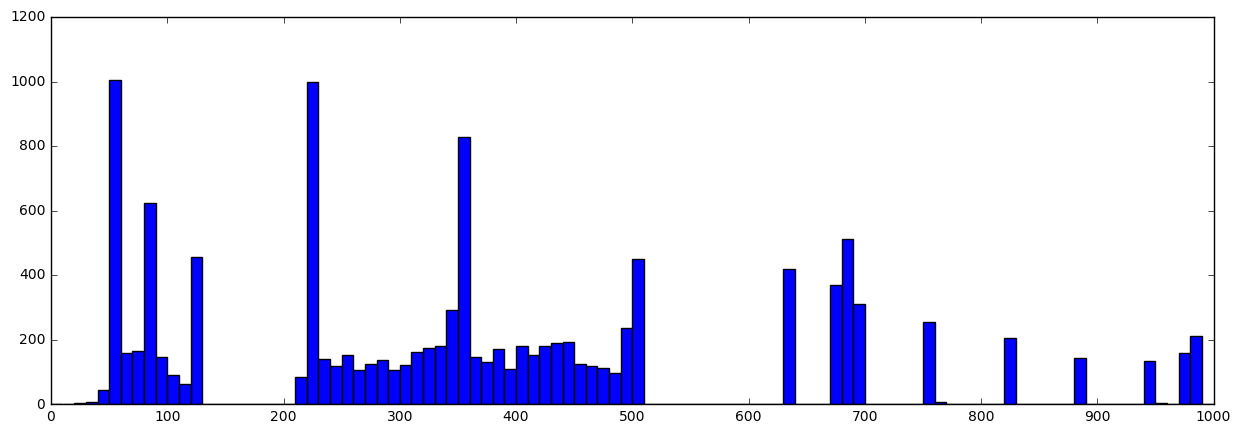

In [8]:
plt.figure(figsize=(15,5))
plt.hist(r, bins=np.linspace(0, 1000, 101))
plt.xticks(np.linspace(0, 1000, 11))
plt.show()

## Plot tracks

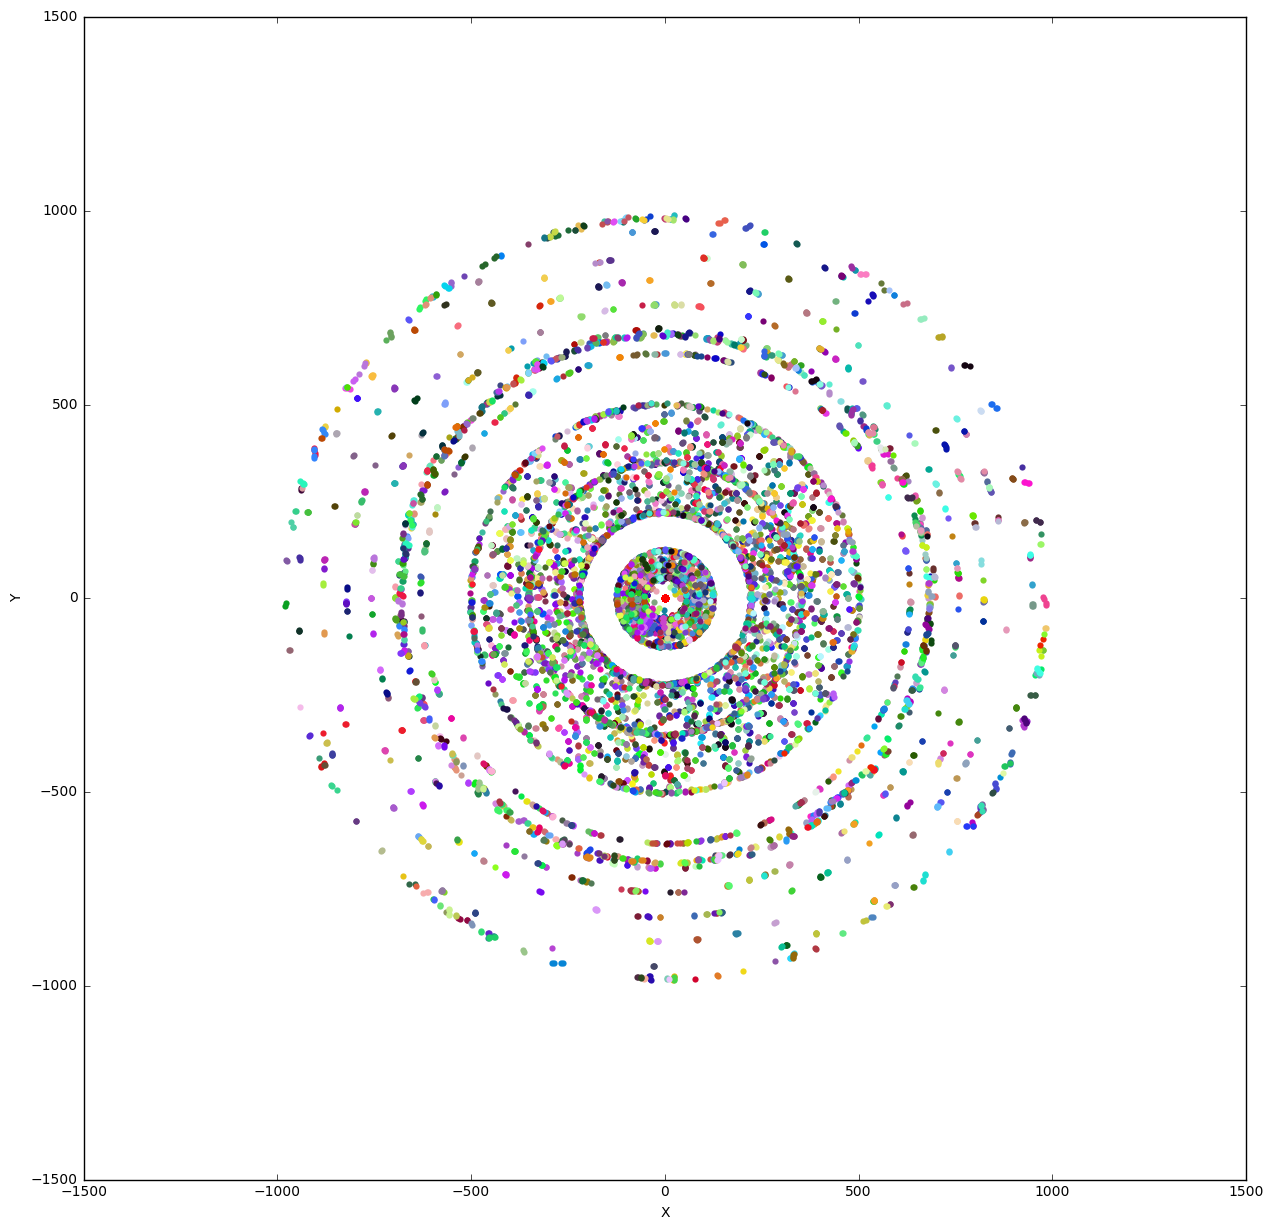

In [9]:
x = event.X.values
y = event.Y.values
z = event.Z.values

plt.figure(figsize=(15,15))

for i_track in np.unique(event.TrackID.values):
    sel = (event.TrackID == i_track)
    
    c = np.random.rand(3,)
    
    plt.scatter(x[sel], y[sel], c=c, edgecolors=c, linewidths=0.01)
    # plt.plot(x[sel], y[sel], c=c)
    plt.scatter([0], [0], c='r', linewidths=1, edgecolors='r')
    plt.xlabel('X')
    plt.ylabel('Y')

plt.show()

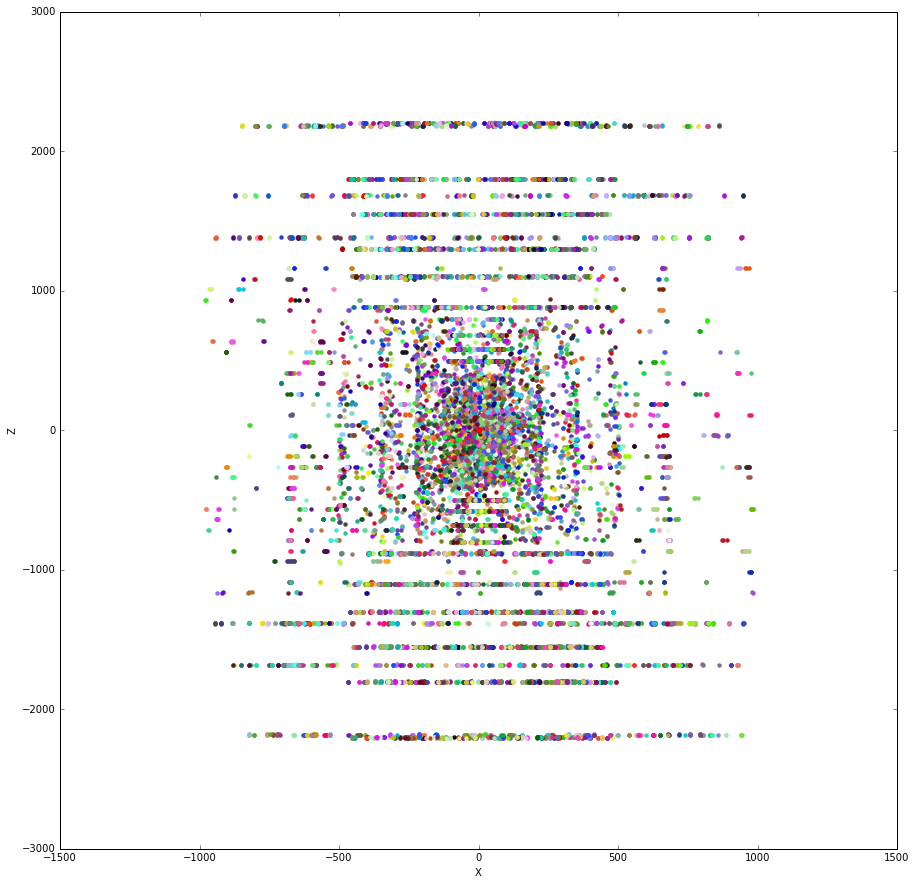

In [10]:
plt.figure(figsize=(15,15))

for i_track in np.unique(event.TrackID.values):
    sel = (event.TrackID == i_track)
    
    c = np.random.rand(3,)
    
    plt.scatter(x[sel], z[sel], c=c, edgecolors=c, linewidths=0.01)
    # plt.plot(x[sel], y[sel], c=c)
    plt.scatter([0], [0], c='r', linewidths=1, edgecolors='r')
    plt.xlabel('X')
    plt.ylabel('Z')

plt.show()

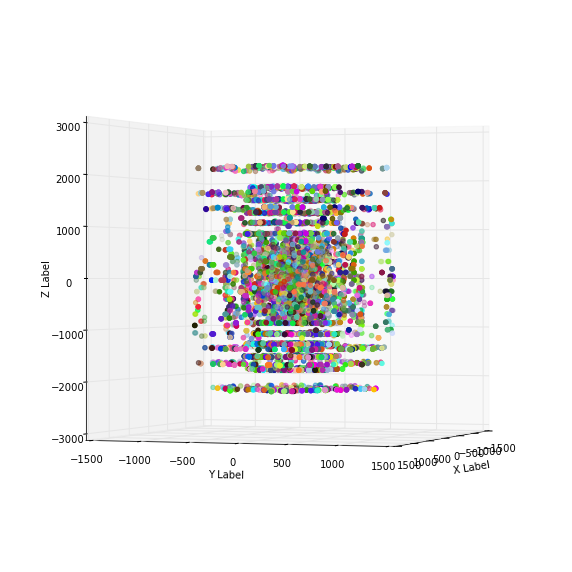

In [11]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')


for i_track in np.unique(event.TrackID.values):
    atrack = event[event.TrackID == i_track]
    c = np.random.rand(3,)
    ax.scatter(atrack.X.values, atrack.Y.values, atrack.Z.values, c=c, edgecolors=c)
    # ax.plot3D(atrack.X.values, atrack.Y.values, atrack.Z.values, c=c)



ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.azim = 20 #20
ax.elev = 0 # 10

plt.show()

## Spherical coordinates

In [9]:
x = event.X.values
y = event.Y.values
z = event.Z.values

r = np.sqrt(x**2 + y**2 + z**2)
theta = np.arctan2(np.sqrt(x**2 + y**2), z)
phi = np.arctan2(y, x)

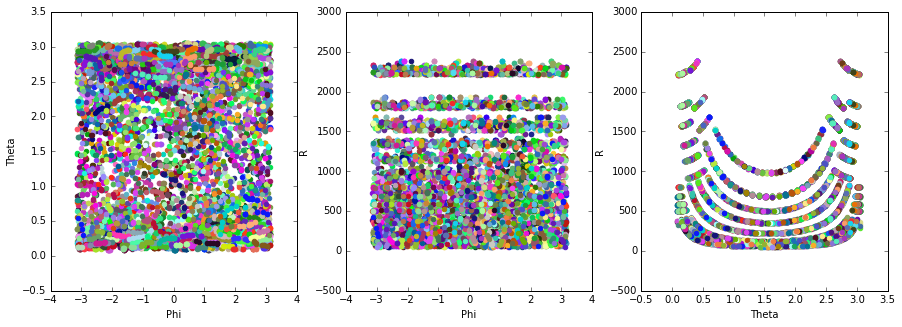

In [13]:
plt.figure(figsize=(15,5))

for i_track in np.unique(event.TrackID.values):
    sel = (event.TrackID == i_track)
    
    c = np.random.rand(3,)
    
    plt.subplot(131)
    plt.scatter(phi[sel], theta[sel], c=c, edgecolors=c)
    # plt.plot(phi[sel], theta[sel], c=c)
    plt.xlabel('Phi')
    plt.ylabel('Theta')
    
    plt.subplot(132)
    plt.scatter(phi[sel], r[sel], c=c, edgecolors=c)
    # plt.plot(phi[sel], r[sel], c=c)
    plt.xlabel('Phi')
    plt.ylabel('R')
    
    plt.subplot(133)
    plt.scatter(theta[sel], r[sel], c=c, edgecolors=c)
    # plt.plot(theta[sel], r[sel], c=c)
    plt.xlabel('Theta')
    plt.ylabel('R')

plt.show()

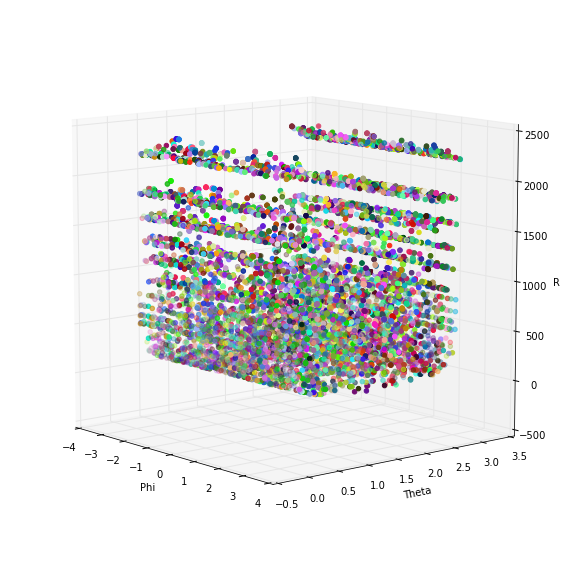

In [14]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')


for i_track in np.unique(event.TrackID.values):
    sel = event.TrackID == i_track
    c = np.random.rand(3,)
    ax.scatter(phi[sel], theta[sel], r[sel], c=c, edgecolors=c)
    # ax.plot3D(phi[sel], theta[sel], r[sel], c=color)



ax.set_xlabel('Phi')
ax.set_ylabel('Theta')
ax.set_zlabel('R')

ax.azim = -40 #20
ax.elev = 10 # 10

plt.show()

## Cylindrical coordinates

In [10]:
x = event.X.values
y = event.Y.values
z = event.Z.values

r = np.sqrt(x**2 + y**2)
phi = np.arctan2(y, x)
z = z

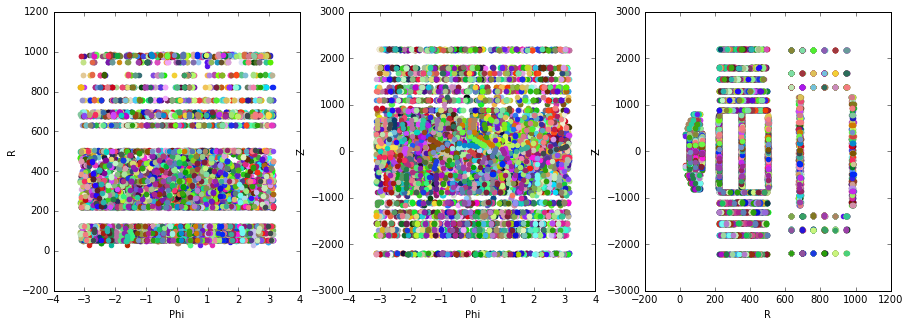

In [16]:
plt.figure(figsize=(15,5))

for i_track in np.unique(event.TrackID.values):
    sel = (event.TrackID == i_track)
    
    c = np.random.rand(3,)
    
    plt.subplot(131)
    plt.scatter(phi[sel], r[sel], c=c, edgecolors=c)
    # plt.plot(phi[sel], r[sel], c=c)
    plt.xlabel('Phi')
    plt.ylabel('R')
    
    plt.subplot(132)
    plt.scatter(phi[sel], z[sel], c=c, edgecolors=c)
    # plt.plot(phi[sel], z[sel], c=c)
    plt.xlabel('Phi')
    plt.ylabel('Z')
    
    plt.subplot(133)
    plt.scatter(r[sel], z[sel], c=c, edgecolors=c)
    # plt.plot(r[sel], z[sel], c=c)
    plt.xlabel('R')
    plt.ylabel('Z')

plt.show()

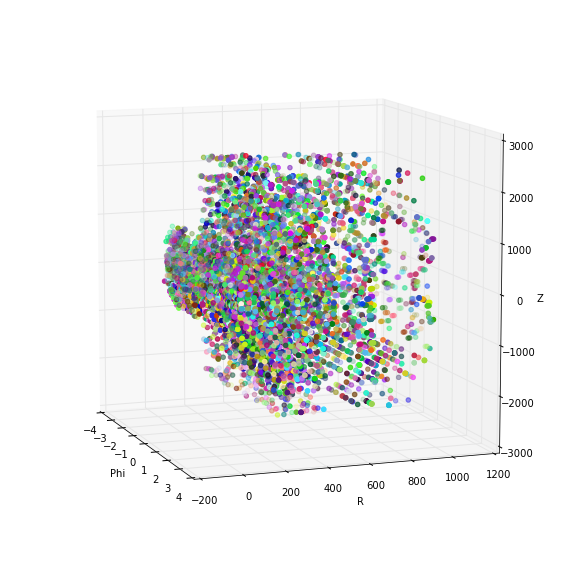

In [17]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')


for i_track in np.unique(event.TrackID.values):
    sel = event.TrackID == i_track
    c = np.random.rand(3,)
    ax.scatter(phi[sel], r[sel], z[sel], c=c, edgecolors=c)



ax.set_xlabel('Phi')
ax.set_ylabel('R')
ax.set_zlabel('Z')

ax.azim = -20 #20
ax.elev = 10 # 10

plt.show()

## DBSCAN

In [54]:
from sklearn.cluster import MeanShift, DBSCAN, Birch, AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler

class Clusterer(object):
    
    def __init__(self, eps):
        
        self.eps = eps
    
    def cartesian2spherical(self, X):
        
        x = X[:, [0]]
        y = X[:, [1]]
        z = X[:, [2]]
        
        r = np.sqrt(x**2 + y**2 + z**2)
        theta = np.arctan2(np.sqrt(x**2 + y**2), z)
        phi = np.arctan2(y, x)
        
        XX = np.concatenate((phi, theta), axis=1)
        
        return XX
    def cost(self,i,j,k):
        r_ij=euclidean(i,j)
        r_jk=euclidean(j,k)
        ji = j - i
        kj = k - j
        cos=np.dot(ji, kj) / (np.linalg.norm(ji) * np.linalg.norm(kj))
        cos=cos**5
        return (cos/r_ij+r_jk)
    def computeGram(self,X):
        G=[]
        for n in range(len(X)):
            i=np.array(X[n])
            for f in range(n+1,len(X)):
                j=np.array(X[f])
                for s in range(f+1,len(X)):
                    k=np.array(X[s])           
                    T=self.cost(i,j,k)
                    G.append(T)
        return G
    def mycosine(self,L):
        n=len(L)
        M=np.identity(n)
        for i in range(n):
            for j in range(i+1,n):
                if euclidean(L[i][2],L[j][2])>500:
                    M[i,j]=2
                else:
                    M[i,j]=cosine(L[i][2],L[j][2])
        np.fill_diagonal(M, 0)    
      #  tril = np.tril_indices_from(M, -1) # take lower & upper triangle's indices
     #   triu = np.triu_indices_from(M, 1)  # (without diagonal)
    #    M[tril] = M[triu]
        return M

    def predict(self, X):
        
        XX = X.copy()
        XX = self.cartesian2spherical(X)
        
        mms = MinMaxScaler()
        XX = mms.fit_transform(XX)
        
        db = DBSCAN(eps=self.eps,algorithm='brute',metric="cosine")
        # db = Birch(threshold = 0.004, n_clusters=None)
        db.fit_predict(XX)
        
        return db.labels_

In [59]:
%%time
from scipy.spatial.distance import euclidean,cosine
X = event[['X', 'Y', 'Z']].values
y_true = event[['EventID', 'TrackID']].values

cl = Clusterer(eps=0.004) # 0.004
y_pred = cl.predict(X)

CPU times: user 24 ms, sys: 0 ns, total: 24 ms
Wall time: 7.48 ms


# Ramp 2D score funstion

In [60]:
from score2D import score_function

score_function(y_true, y_pred)

0.09069212410501193

# Sabrina's score function

In [9]:
from scipy import interpolate
from random import randint
from collections import Counter

def sortAlongZ(c,index=None):
    """
    Sorting a track along the Z coordinate
    """
    Z=[i[2] for i in c]
    zi=[i[0] for i in sorted(enumerate(Z), key=lambda x:x[1])]
    c = [c[i] for i in zi]
    if index is not None:
        return [index[i] for i in zi]
    return c

def get_hits_id(solution,index):
    reco_tracks=[]
    for l in np.unique(solution):
        reco_tracks.append(index[np.array(np.where(solution==l)[0])])
    return reco_tracks

def fetch_truth_ID(Reco_track,df,Ratio_truth_matching=0.5): 
    """
    Reconstructed track is a list of hits ID
    Retreives truth track from reconstucted one based on >50% shared points   
    """
    labels=[]
    #for each hit, retreive corresponding particle ID
    for h in Reco_track:
        matched_particle=df.loc[df.index==h].TrackID.values[0]
        labels.append(matched_particle)
    most_common_track= Counter(labels).most_common(1)[0]
    most_common_label= most_common_track[0]
    truth=df.loc[df.TrackID==most_common_label]
    truth=sortAlongZ(truth[['X', 'Y', 'Z']].values,index=truth.index.values)
    ratio_hits_matched=most_common_track[1]/float(len(truth))
    if ratio_hits_matched >Ratio_truth_matching:
        return truth
    else:
        #Less than 50% of truth track reconstructed
        return None

def bspline(cv, n=50, degree=2):
    """ 
    Edited from stackoverflow.com - question /fast-b-spline-algorithm-with-numpy-scipy
    Calculates n samples on a bspline
 
    cv :      Array ov control vertices
    n  :      Number of samples to return
    degree:   Curve degree
    periodic: True - Curve is closed
                  False - Curve is open
    """
    cv = np.asarray(cv)
    count = len(cv)
    degree = np.clip(degree,1,count-1)
    # Calculate knot vector
    kv = None
    kv = np.array([0]*degree + list(range(count-degree+1)) + [count-degree]*degree,dtype='int')
    u = np.linspace(0,(count-degree),n)
    points = interpolate.splev(u, (kv,cv,degree))
    return points

def proposal2weight(P=[10,8,6,5,3,3,3,5,6],len_track=9):   
    """
    Extrapolates the proposed points weighted to len_track size
    """
    W=bspline(P,n=len_track)
    return W

def track2cost(Reco_track,truth_track,W_proposal=[10,8,6,5,3,3,3,5,6],W_over_hits=10):
    """
    Reco_track: Recognized track given by clustering techniques

    truth track : the true track

    W_proposal : A weight proposal for each point along the track/curve

    W_over_hits : A weight proposal for appending fake points to the track

    """
    #ratio missed hits
    intersection = [item for item in Reco_track for t in truth_track if (item == t)]

    Purity= len(intersection)/float(len(truth_track))
    if Purity>0.5:
        #weight_missed_hits
        cost=0
        first_hits_lost=0
        intersection=[i for i in intersection]   
        #find position of missed hits
        missed_hits= [hit for hit in truth_track if hit not in intersection]
        pos_missedA=[]
        #Compute cost        
        for m in np.array(missed_hits):
            pos_missed=np.where(truth_track==m)[0][0]
            pos_missedA.append(pos_missed)
            if pos_missed in [0,1,2]:
                first_hits_lost+=1
            if len(truth_track)==len(W_proposal):
                cost+=W_proposal[pos_missed]
            else:
                W_proposal=proposal2weight(len_track=len(truth_track))
                cost+=W_proposal[pos_missed]
        over_ratio=len(Reco_track)/float(len(truth_track))-1
        if over_ratio<0:
            over_ratio=0
        elif over_ratio>0:
            over_ratio=W_over_hits*over_ratio
        

        track_score=1-(cost+over_ratio)/float(sum(W_proposal))
        return track_score,len(Reco_track),len(truth_track),len(intersection),pos_missedA
    else:

        return 0,len(Reco_track),len(truth_track),len(intersection),pos_missedA

In [61]:
#from score import track2cost
score = []
valid=[]
reco_tracks = get_hits_id(y_pred, event.index)
#print "len(reco),len(truth),len(inter),score,pos_missed"
for track in reco_tracks:
    
    truth = fetch_truth_ID(track, event)

    if truth is not None:
        ascore,len_Reco_track,len_truth_track,len_intersection,pos_missedA = track2cost(track, truth)
#    else:
 #       ascore = 0
        score.append(ascore)
     #   valid.append([ascore,len_Reco_track,len_truth_track,len_intersection,pos_missedA])
print np.mean(score),len(score),len(reco_tracks)

-0.918483302412 2 2


In [11]:
df_valid=pd.DataFrame(valid)
df_valid.columns=["score","len_Reco_track","len_truth_track","len_intersection","pos_missedA"]

In [12]:
df_valid.head()

score  len_Reco_track  len_truth_track  len_intersection  \
0  0.616339              15               13                10   
1  0.330055              20               15                 8   
2  0.615587               8                6                 4   
3  0.467604              45               13                11   
4  0.632653               7                9                 7   

              pos_missedA  
0              [0, 1, 12]  
1  [0, 1, 2, 3, 4, 5, 14]  
2                  [4, 5]  
3                [11, 12]  
4                  [0, 1]

In [13]:
#df_valid["purity"]=df_valid.len_intersection/df_valid.len_truth_track
#df_sorted=df_valid.sort_values("purity")
df_sorted["fakes"]=df_sorted.len_Reco_track-df_sorted.len_truth_track

NameError: name 'df_sorted' is not defined

In [14]:
import seaborn as sns
sns.set_style("whitegrid")
fig = plt.figure(figsize=(35,25))
plt.plot(df_sorted.purity,df_sorted.score,"-o")
j=0
for i in range(len(df_sorted.purity)):
    if i>0 and (i>j+3 or df_sorted.score.values[i]<0.2 ) and (len(df_sorted.pos_missedA.values[i])>0 or df_sorted.fakes.values[i]>0)  and df_sorted.purity.values[i]>=df_sorted.purity.values[i-1] and df_sorted.score.values[i]<df_sorted.score.values[i-1]:
        plt.text(df_sorted.purity.values[i],df_sorted.score.values[i]-0.02,str(df_sorted.pos_missedA.values[i])+"-"+str(df_sorted.fakes.values[i]),ha="center",fontsize=25)
        j=i
        
#plt.text(df_sorted.purity,df_sorted.score,"s",ha="center",fontsize=12)          
plt.xlim(0.5,1.01)
plt.xlabel('Purity',fontsize=25)
plt.ylabel('score ',fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=25)
plt.show()

NameError: name 'df_sorted' is not defined

In [70]:
print df_sorted

       score  len_Reco_track  len_truth_track  len_intersection  \
1   0.330055              20               15                 8   
24  0.411035               8               13                 7   
31  0.407515               9               11                 6   
28  0.630385              10                9                 5   
23  0.422525               4                7                 4   
46  0.413746              12               14                 8   
66  0.433241              15               14                 8   
40  0.663600               4                7                 4   
34  0.215609              28               12                 7   
30  0.382923              16               12                 7   
8   0.680531               8               10                 6   
61  0.450053               8               10                 6   
70  0.453604              18               13                 8   
80  0.470588               5                8                 

In [57]:
np.mean(score)

0.6681108125502585

In [41]:
y_pred # recognized hit labels

array([   0,    1,    2, ..., 1578, 3542, 3542])

In [42]:
y_true # [[event_id, track_id], [...], ...]

array([[  0,   0],
       [  0,   0],
       [  0,   0],
       ..., 
       [  0, 999],
       [  0, 999],
       [  0, 999]])